<a href="https://colab.research.google.com/github/Yashgg10/ensemble/blob/main/ENSEMBLE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1️ Can we use Bagging for regression problems?**  
Yes, Bagging can be used for regression problems using the **Bagging Regressor**, which aggregates predictions by averaging the outputs of multiple base regressors, typically Decision Trees.

---

### **2️ Difference between multiple model training and single model training?**  
- **Single model training**: Uses a single model (e.g., Decision Tree, SVM) to learn patterns from data. It may suffer from **overfitting** or **underfitting** depending on complexity.  
- **Multiple model training (Ensemble Learning)**: Combines multiple models (e.g., Bagging, Boosting) to improve performance, reduce variance, and enhance robustness.

---

### **3️ Feature Randomness in Random Forest**  
Random Forest introduces **feature randomness** by selecting a **random subset of features** for each decision tree at every split. This helps in reducing correlation between trees and improves generalization.

---

### **4️ What is OOB (Out-of-Bag) Score?**  
OOB (Out-of-Bag) score is an internal validation metric in Bagging-based models like Random Forest. Since each tree is trained on a bootstrap sample (random subset), **OOB samples** (left-out data) can be used to evaluate performance without needing a separate validation set.

---

### **5️ Measuring Feature Importance in Random Forest**  
Feature importance in Random Forest can be measured using:  
- **Mean Decrease in Impurity (MDI)**: Average reduction in Gini impurity or variance when a feature is used in splits.  
- **Permutation Importance**: Measures the drop in model accuracy when feature values are randomly shuffled.

---

### **6️ Working Principle of a Bagging Classifier**  
- Randomly samples data using **bootstrap sampling**  
- Trains multiple classifiers (e.g., Decision Trees) independently  
- Aggregates predictions using **majority voting** (classification) or **averaging** (regression)  

---

### **7️ Evaluating a Bagging Classifier’s Performance**  
- **Accuracy, Precision, Recall, F1-score** (for classification tasks)  
- **ROC-AUC Curve** for binary classification  
- **Cross-validation** to check stability  

---

### **8️ How does a Bagging Regressor work?**  
- Creates multiple bootstrap samples from training data  
- Trains a base regressor (e.g., Decision Tree) on each sample  
- Aggregates predictions using **averaging**  

---

### **9️ Main Advantage of Ensemble Techniques**  
They improve **accuracy, robustness, and generalization** while reducing **overfitting** compared to single models.

---

### **10 Main Challenge of Ensemble Methods**  
- Higher **computational cost**  
- Difficult **interpretability**  
- **Overfitting risk** if not tuned properly  

---

### **1️1️ Key Idea Behind Ensemble Techniques**  
Combine multiple weak models to create a stronger, more **accurate** and **robust** model.

---

### **1️2️ What is a Random Forest Classifier?**  
A Random Forest Classifier is an **ensemble of decision trees**, where each tree is trained on a random subset of data and features. Predictions are made using **majority voting**.

---

### **1️3️ Main Types of Ensemble Techniques**  
- **Bagging** (Bootstrap Aggregating)  
- **Boosting** (e.g., AdaBoost, Gradient Boosting)  
- **Stacking** (Combining multiple models using a meta-model)  

---

### **1️4️ What is Ensemble Learning?**  
A technique that combines multiple models to improve accuracy and robustness compared to a single model.

---

### **1️5️ When to Avoid Ensemble Methods?**  
- When computational cost is too high  
- When interpretability is critical (e.g., medical decisions)  
- When a single model is already performing well  

---

### **1️6️ How does Bagging Reduce Overfitting?**  
Bagging reduces **variance** by training multiple models on different bootstrap samples and averaging their predictions, leading to **smoother decision boundaries**.

---

### **1️7️ Why is Random Forest Better than a Single Decision Tree?**  
- Less prone to **overfitting**  
- More **robust** to noise  
- Provides **feature importance**  
- **Generalizes** better on unseen data  

---

### **1️8️ Role of Bootstrap Sampling in Bagging**  
Bootstrap sampling allows each base model to train on **different subsets** of data, increasing model diversity and reducing overfitting.

---

### **1️9️ Real-World Applications of Ensemble Techniques**  
- Fraud detection  
- Medical diagnosis  
- Stock market prediction  
- Image recognition (e.g., facial recognition)  
- Customer churn prediction  

---

### **20 Difference Between Bagging and Boosting**  
| Feature  | Bagging | Boosting |
|----------|--------|---------|
| Purpose | Reduce variance | Reduce bias and variance |
| Training | Independent models in parallel | Sequential models improving weak learners |
| Weighting | Equal weight to all models | Adjusts weights based on performance |
| Overfitting | Less likely | More likely if overtrained |

---


In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8333333333333334

In [3]:
# Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)2
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=100, n_features=4, n_informative=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

103.86491688199779

In [4]:
# Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores2
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
df = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2, random_state=1)
model = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=1)
model.fit(X_train, y_train)
model.feature_importances_

array([0.00147916, 0.01238211, 0.06949041, 0.00514239, 0.00262694,
       0.00356893, 0.07459753, 0.14783188, 0.00208678, 0.0038076 ,
       0.00425333, 0.00187868, 0.00553387, 0.01144711, 0.00160612,
       0.00211464, 0.00201814, 0.00063813, 0.00339736, 0.00247693,
       0.19435529, 0.01519088, 0.17392168, 0.17153703, 0.00842543,
       0.01248691, 0.00857905, 0.04549092, 0.00849854, 0.00313621])

In [6]:
# Train a Random Forest Regressor and compare its performance with a single Decision Tree2
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=4, n_informative=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(mean_squared_error(y_test, y_pred))

86.48261202047713
105.52546663145492


In [7]:
# Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=1)
model.fit(X_train, y_train)
model.oob_score_

0.8714285714285714

In [8]:
# Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [10]:
# Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
trees = [1, 10, 50, 100, 200, 500]
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=1, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
def model(trees):
    for i in trees:
        model = RandomForestClassifier(n_estimators=i, criterion='entropy',max_features='log2')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Number of trees:", i, "Accuracy:", accuracy_score(y_test, y_pred))
model(trees)

Number of trees: 1 Accuracy: 0.9333333333333333
Number of trees: 10 Accuracy: 0.9
Number of trees: 50 Accuracy: 0.9333333333333333
Number of trees: 100 Accuracy: 0.9
Number of trees: 200 Accuracy: 0.9333333333333333
Number of trees: 500 Accuracy: 0.9


In [11]:
# Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.925

In [12]:
# Train a Random Forest Regressor and analyze feature importance scores
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=4, n_informative=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
model.feature_importances_

array([0.21472026, 0.76893963, 0.00669011, 0.00965   ])

In [13]:
# Train an ensemble model using both Bagging and Random Forest and compare accuracy.
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(n_estimators=10, criterion='entropy',max_features='log2')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
bag = BaggingClassifier(n_estimators=10, random_state=1)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9
Bagging Accuracy: 0.8333333333333334


In [16]:
# Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"without hyperparameter tuning, Accuracy is, {accuracy_score(y_test, y_pred)}")

# hyperparameter tuning
params = {
    'n_estimators': [100, 250, 500],
    'max_depth': [5, 10, 25],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"with hyperparameter tuning, Accuracy is, {accuracy_score(y_test, y_pred)}")

without hyperparameter tuning, Accuracy is, 0.9333333333333333
Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.929 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.929 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.929 total time=   0.4s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_l

In [17]:
# Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=4, n_informative=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
num_base_estimators = [100, 200, 500, 800, 1200, 1500]
def model(num_base_estimators):
    for i in num_base_estimators:
        model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=i, random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Number of base estimators: ", i, "MSE: ", mean_squared_error(y_test, y_pred))
model(num_base_estimators)

Number of base estimators:  100 MSE:  102.91370087779933
Number of base estimators:  200 MSE:  107.92746433177942
Number of base estimators:  500 MSE:  106.10123589737188
Number of base estimators:  800 MSE:  102.71678755176072
Number of base estimators:  1200 MSE:  103.5927413866179
Number of base estimators:  1500 MSE:  102.18600901558085


In [19]:
# Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier Accuracy: 0.9533333333333334
Decision Tree Classifier Accuracy: 0.9333333333333333


In [37]:
# Train a Random Forest Classifier and analyze misclassified samples
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
misclassified = X_test[y_pred != y_test]
print(misclassified)
print("Number of misclassified samples:", len(misclassified))

[[-0.80022106 -0.68304936  1.95591231  0.39009332]
 [-3.697436   -0.46122013 -1.42406091 -0.49331988]]
Number of misclassified samples: 2


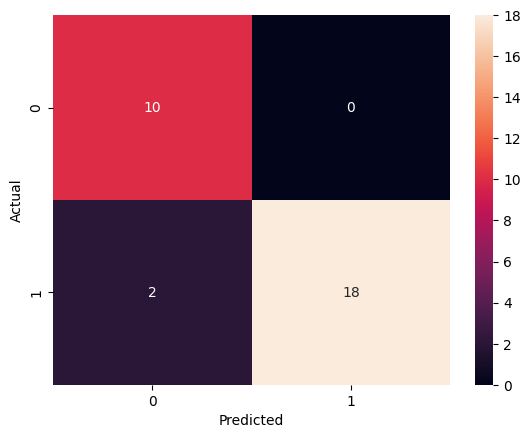

In [21]:
#  Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
X,y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
models = {
    'dt': DecisionTreeClassifier(),
    'svm': SVC(),
    'lr': LogisticRegression()
}
def model(models):
    for name, model in models.items():
        clf = StackingClassifier(estimators=[(name, model)])
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        from sklearn.metrics import accuracy_score
        print(f'{name} accuracy: {accuracy_score(y_test, y_pred)}')
model(models)

dt accuracy: 0.8
svm accuracy: 0.9
lr accuracy: 0.9


In [25]:
# Train a Random Forest Classifier and print the top 5 most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(5):
    print(f"Feature {indices[i]+1}: {importances[indices[i]]}")

Feature 3: 0.34631082087424453
Feature 6: 0.20391642624202877
Feature 2: 0.13272889248537953
Feature 10: 0.09609222287927244
Feature 8: 0.0405489928592883


In [26]:
# Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
X,y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Precision: 0.950354609929078
Recall: 0.9436619718309859
F1-score: 0.9469964664310954


In [27]:
# Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X,y = make_classification(n_samples=1500, n_features=100, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
max_depths = [5, 10, 25, 50]
def model(max_depths):
    for i in max_depths:
        model = RandomForestClassifier(max_depth=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Max depth:", i, "Accuracy:", accuracy_score(y_test, y_pred))
model(max_depths)

Max depth: 5 Accuracy: 0.8977777777777778
Max depth: 10 Accuracy: 0.8933333333333333
Max depth: 25 Accuracy: 0.8955555555555555
Max depth: 50 Accuracy: 0.9044444444444445


In [29]:
# Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
models = {
    'dt': DecisionTreeRegressor(),
    'knn': KNeighborsRegressor()
}
def model(models):
    for name, model in models.items():
        clf = BaggingRegressor(estimator=model)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f'{name} MSE: {mean_squared_error(y_test, y_pred)}')
model(models)

dt MSE: 0.2892092369377028
knn MSE: 1.1001402470605006


In [34]:
# Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=4, n_informative=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
sample_sizes = [0.3, 0.5, 0.7, 1.0]
def model(sample_sizes):
    for i in sample_sizes:
        model = BaggingRegressor(max_samples=i, random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Bootstrap samples:", i, "MSE:", mean_squared_error(y_test, y_pred))
model(sample_sizes)

Bootstrap samples: 0.3 MSE: 82.08801926639482
Bootstrap samples: 0.5 MSE: 85.9279902810475
Bootstrap samples: 0.7 MSE: 87.29047939874778
Bootstrap samples: 1.0 MSE: 103.86491688199779
